In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
df = pd.read_csv('Pokemon_utf-8.csv' , index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


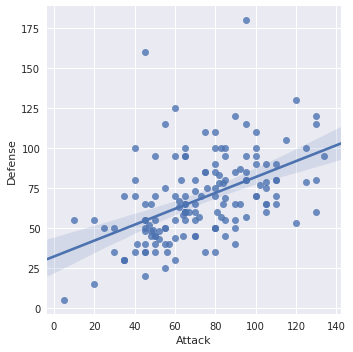

In [3]:
# making a scatter plot in seaborn is just one line of code using the lmplot() function
# Recommended way

sns.lmplot(x='Attack' , y='Defense' , data=df)

# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

(0, 142.24751714431403)

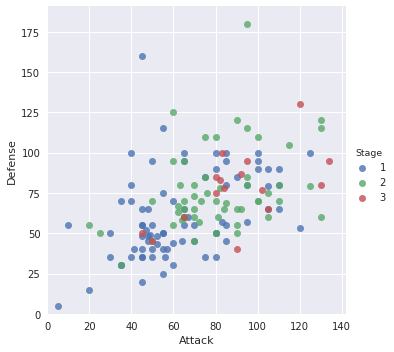

In [4]:
# Scatterplot arguments
# fit_reg = False : to remove the regression line from the plot
# hue : this argument is very useful because it allows you to express a 
# third dimension of information using color
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage


# Tweak using matplotlib
plt.ylim(0,None)
plt.xlim(0,None)

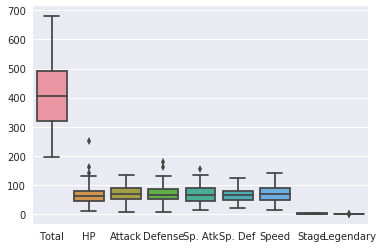

In [5]:
# Default Boxplot 
sns.boxplot(data=df)

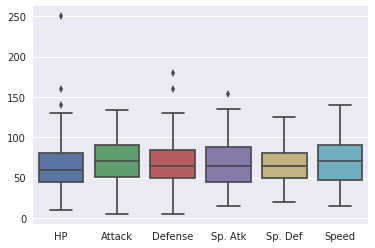

In [6]:
# to remove some of the box-plots contents
# preformat the dataframe
stats_df = df.drop(columns=['Total' , 'Stage' , 'Legendary'])

# new boxplot using stats_df
sns.boxplot(data=stats_df)

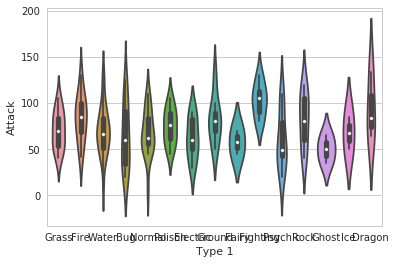

In [7]:
# set theme
sns.set_style('whitegrid')

# Violin Plot : 
# They show the distribution (through the thickness of the violin) 
# instead of only the summary statistics.

sns.violinplot(x='Type 1' , y='Attack', data=df)

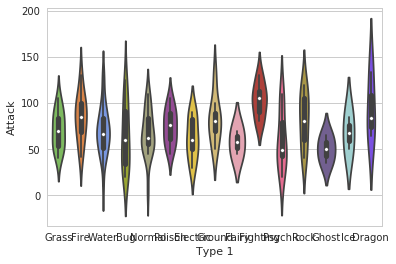

In [8]:
# SETTING CUSTOM COLORS
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
# Set color palette
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors) 

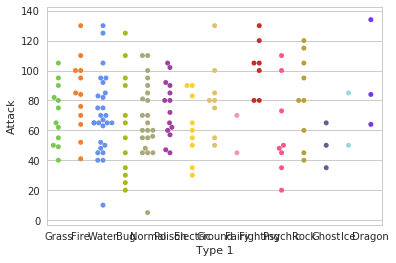

In [9]:
# Violin plots are great for visualizing distributions. 
# However, since we only have 151 Pokémon in our dataset, 
# we may want to simply display each point.
# That's where the swarm plot comes in. 
# This visualization will show each point, 
# while "stacking" those with similar values:

# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

### Overlaying Plots
It's pretty straightforward to overlay plots using Seaborn, and it works the same way as with Matplotlib. Here's what we'll do:

1. First, we'll make our figure larger using Matplotlib.
2. Then, we'll plot the violin plot. However, we'll set inner=None to remove the bars inside the violins.
3. Next, we'll plot the swarm plot. This time, we'll make the points black so they pop out more.
4. Finally, we'll set a title using Matplotlib.

Text(0.5,1,'Attack by Type')

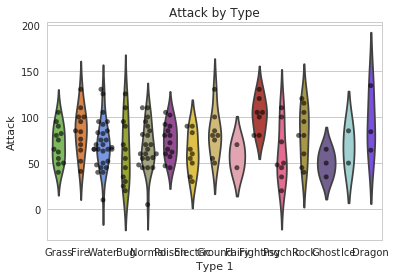

In [10]:
# No need alresy done in the beginning
# Set figure size somewhat large with matplotlib
# plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.6) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

### Putting it all together.
Well, we could certainly repeat that chart for each stat. But we can also combine the information into one chart... we just have to do some data wrangling with Pandas beforehand.

In [11]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


As you can see, all of our stats are in separate columns. 
Instead, we want to "melt" them into one column.

To do so, we'll use Pandas's melt() function. It takes 3 arguments:

1. First, the DataFrame to melt.
2. Second, ID variables to keep (Pandas will melt all of the other ones).
3. Finally, a name for the new, melted variable.

In [12]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


All 6 of the stat columns have been "melted" into one, and the new Stat column indicates the original stat (HP, Attack, Defense, Sp. Attack, Sp. Defense, or Speed). For example, it's hard to see here, but Bulbasaur now has 6 rows of data.

In [13]:
print(stats_df.shape)
print(melted_df.shape)

(151, 9)
(906, 5)


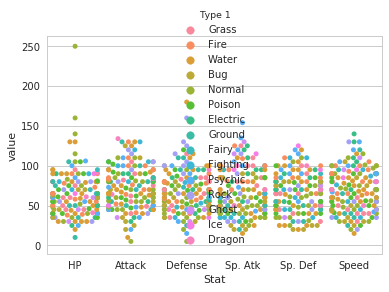

In [14]:
# making a swarm plot with melted data
# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

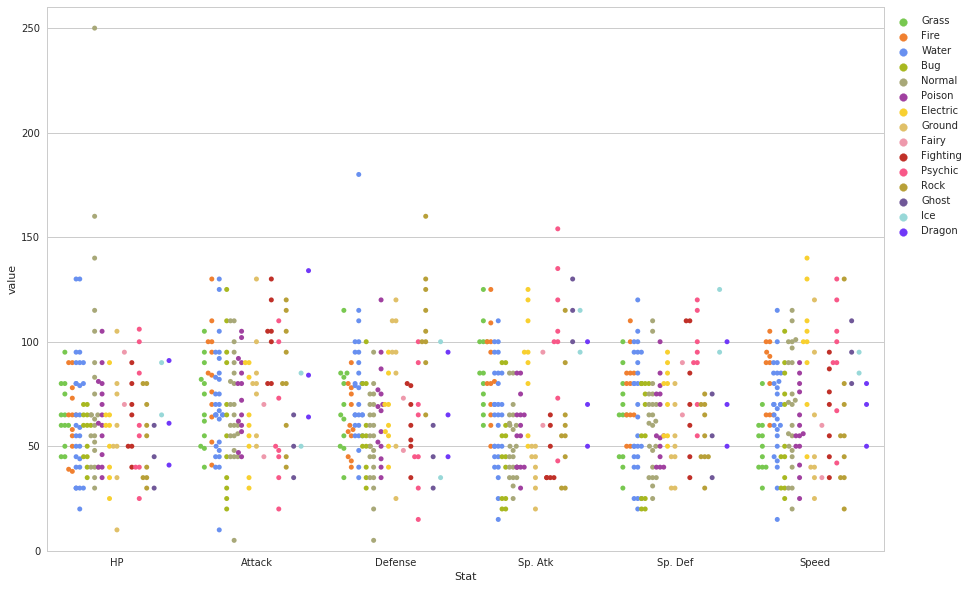

In [15]:
# 1. Enlarge the plot
plt.figure(figsize=(15,10))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

## Correlations & Heatmaps

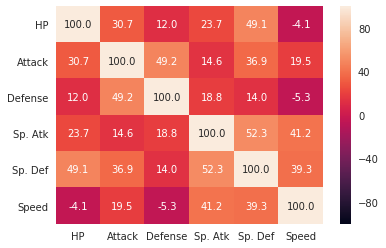

In [16]:
# Calculate correlations
corr = stats_df.corr()*100
 
# Heatmap
sns.heatmap(corr , annot=True , vmin=-100 , vmax=100 , fmt=".1f")

## Histogram
Histograms allow you to plot the distributions of numeric variables.

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


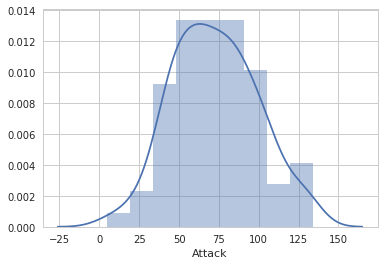

In [17]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

## Bar Plot
Bar plots help you visualize the distributions of categorical variables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

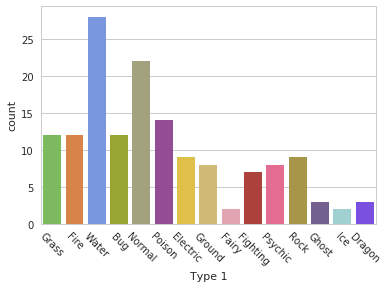

In [18]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

## Factor Plot
Factor plots make it easy to separate plots by categorical classes.

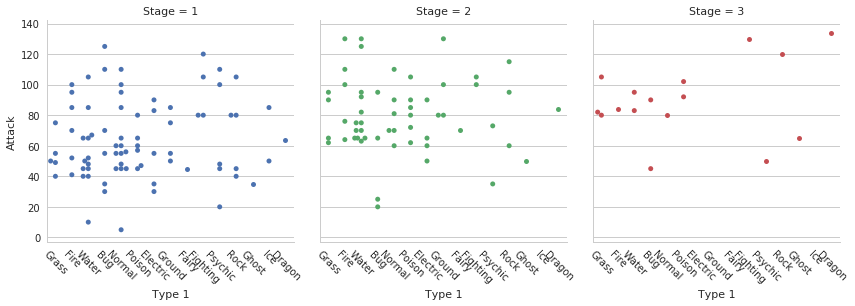

In [19]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

## Density Plot
Density plots display the distribution between two variables.

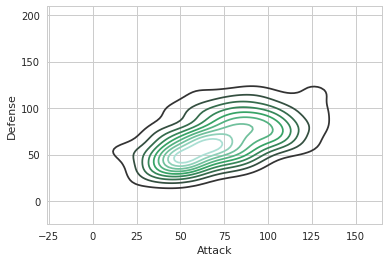

In [20]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

## Joint Distribution
Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


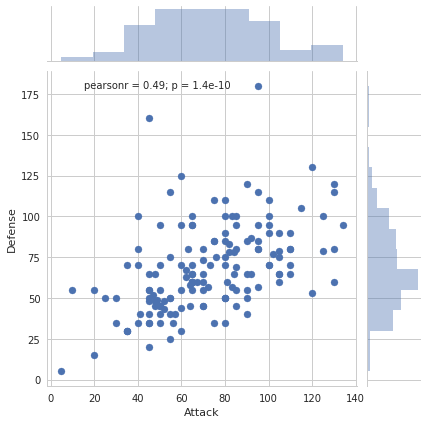

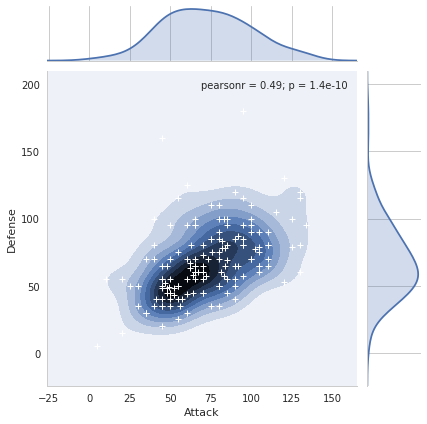

In [21]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)
# Joint Distribution Plot
g = sns.jointplot(x='Attack', y='Defense', data=df , kind="kde")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")

## Pair Plot

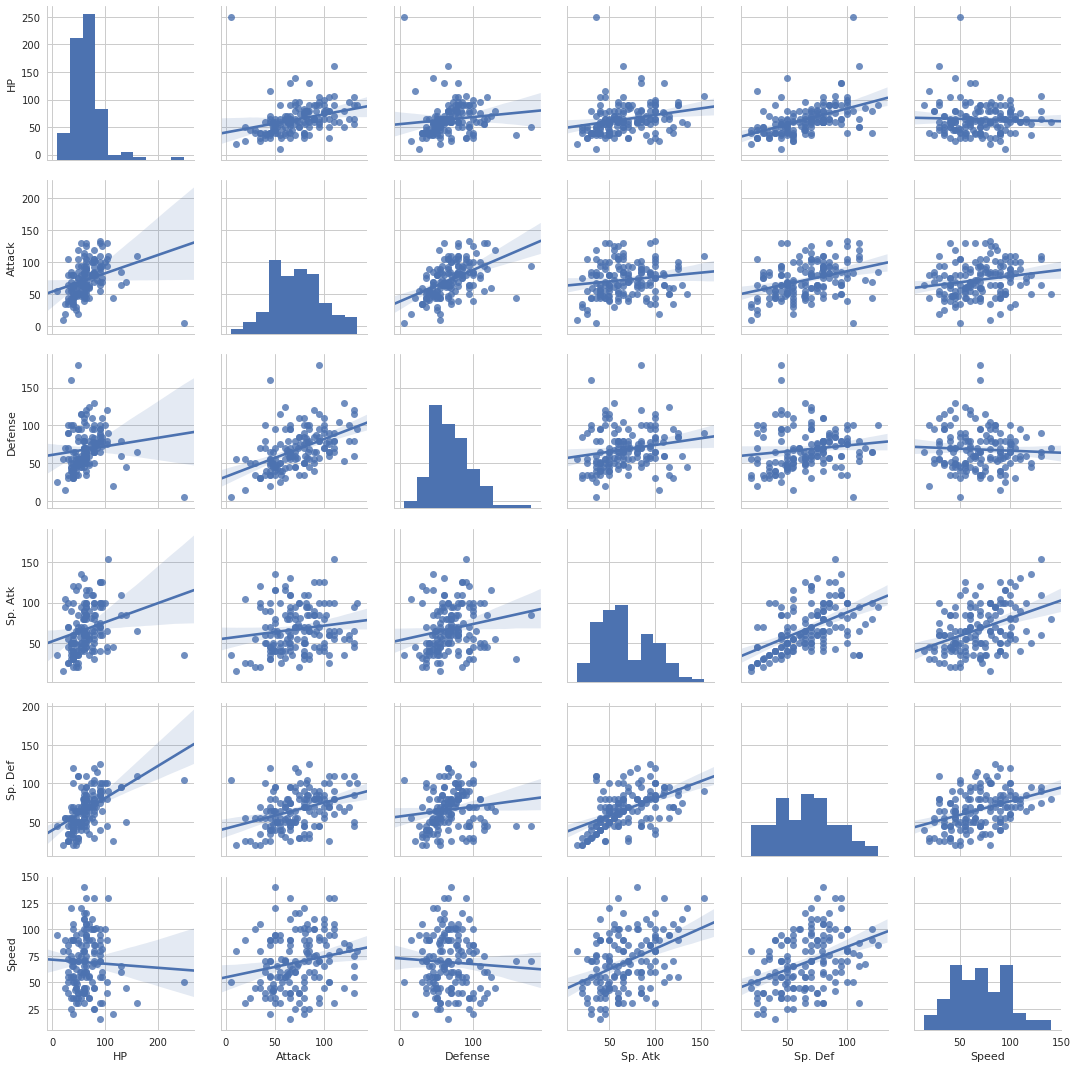

In [22]:
sns.pairplot(stats_df , kind='reg');